# K-means clustering: intuitive explanation

The notebook provides an intuitive description and explanation of the k-means clustering technique. A synthetic dataset will be used to identify clusters manually.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For arrays, matrices, and functions to operate on them
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots


# Importing data

In [2]:
# Create synthetic data that consists of 5 points and 2 variables
d = {'x1': [2, 4, 2, 6, 6],
     'x2': [2, 3, 4, 6, 5]}

# Construct the dataframe
df = pd.DataFrame(data=d)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
# Print the dataset
df


,x1,x2
0,2,2
1,4,3
2,2,4
3,6,6
4,6,5


2. Scatter plot of the data

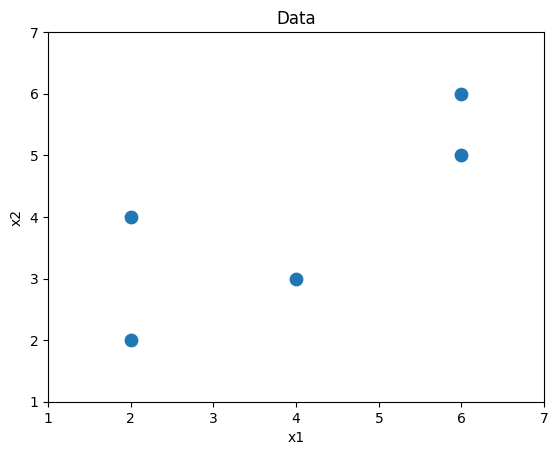

In [4]:
# Plot scatter plot
plt.scatter(df.x1,df.x2, s=80)
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(1,7)
plt.ylim(1,7)
plt.show()


Note that for this dataset we do not know in advance the cluster/group/class to which each point belongs to, and that is what we want to do: to identify the existing cluster/group/class, i.e., to assing each point to a cluster/group/class

3. Preprocessing the data

No preprocessing is required

# Kmeans clustering

Intuitive explanation

### Initialize/Preliminaries

In [5]:
# Compute the number of points in the dataset
index = df.index
Npoints = len(index)

print("The number of pints is", Npoints)


The number of pints is 5


## 1: Specify the number of clusters

Define the number $K$ of clusters

In [6]:
# Let's assume our data has two clusters (note that the rest of the code is for K=2)
K  = 2

## 2: Initialize the centroids of the clusters

Randomly initialize the centroids of the clusters $C_1, C_2, \cdots, C_K$

In [7]:
# Let's initialize the centroids for the K=2 clusters (this has to be done randomly)

# Let's do it manually
C1new = np.array([1.5,3.0])  # 1st Centroid
C2new = np.array([3.0,3.0])  # 2nd Centroid

# Print centroids
print(C1new)
print(C2new)



[1.5 3. ]
[3. 3.]


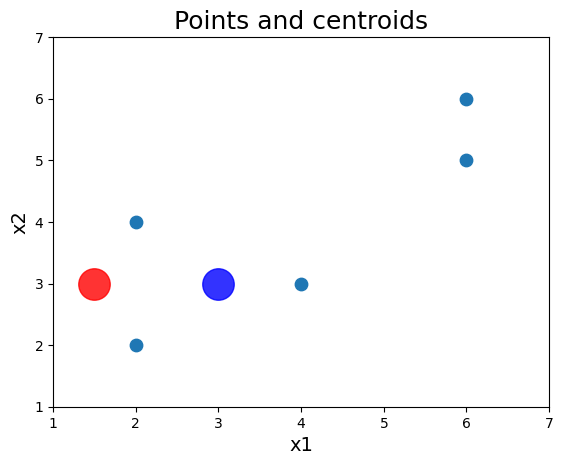

In [8]:
# Plot the points and the centroids
plt.scatter (df.x1,df.x2, s=80)
plt.scatter (C1new[0],C1new[1], color='r', marker= 'o', label= 'Centroide 1', s=512, alpha=0.8)
plt.scatter (C2new[0], C2new[1], color= 'b', marker='o', label= 'Centroide 2', s=512, alpha=0.8)
plt.title('Points and centroids', fontsize=18)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.xlim(1,7)
plt.ylim(1,7)
plt. show()



## 3:  Repeat the following


Define the current centroids

In [9]:
# Define centrode 1
C1 = C1new.copy()
C1


array([1.5, 3. ])

In [10]:
# Define centrode 2
C2 = C2new.copy()
C2

array([3., 3.])

## 4: Assign each point  to its closest centroid

Compute the distance of each data point to each centroid

Assign each point to the centroid with the minimum Euclidean distance

Euclidean distance:
- Consider two points $x=(x_1,x_2)$ and  $y=(y_1,y_2)$.
- The Euclidean distance between these two points is
$ d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 } $


In [11]:
# Compute the distance of each data point to each centroid

# Variable to save the distance of each point ot each centroid
Dis2Centroids = np.zeros((Npoints,K))

# Let's compute the distances manually
ipoint, x1, x2=0,2,2
Dis2Centroids[ipoint,0]=np.sqrt((x1-C1[0])**2 + (x2-C1[1])**2)
Dis2Centroids[ipoint,1]=np.sqrt((x1-C2[0])**2 + (x2-C2[1])**2)
ipoint, x1, x2=1,3,4
Dis2Centroids[ipoint,0]=np.sqrt((x1-C1[0])**2 + (x2-C1[1])**2)
Dis2Centroids[ipoint,1]=np.sqrt((x1-C2[0])**2 + (x2-C2[1])**2)
ipoint, x1, x2=2,2,4
Dis2Centroids[ipoint,0]=np.sqrt((x1-C1[0])**2 + (x2-C1[1])**2)
Dis2Centroids[ipoint,1]=np.sqrt((x1-C2[0])**2 + (x2-C2[1])**2)
ipoint, x1, x2=3,6,6
Dis2Centroids[ipoint,0]=np.sqrt((x1-C1[0])**2 + (x2-C1[1])**2)
Dis2Centroids[ipoint,1]=np.sqrt((x1-C2[0])**2 + (x2-C2[1])**2)
ipoint, x1, x2=4,6,5
Dis2Centroids[ipoint,0]=np.sqrt((x1-C1[0])**2 + (x2-C1[1])**2)
Dis2Centroids[ipoint,1]=np.sqrt((x1-C2[0])**2 + (x2-C2[1])**2)



# Print results
print(Dis2Centroids)


[[1.11803399 1.41421356]
 [1.80277564 1.        ]
 [1.11803399 1.41421356]
 [5.40832691 4.24264069]
 [4.9244289  3.60555128]]


In [12]:
# Assign each point to the centroid with the minimum Euclidean distance

# Let's do this manually
#cluster = np.array ([1,2,1,2,2])
#cluster = np.array ([1,1,1,2,2])
cluster = np.array([1,1,1,2,2])


# Print results
print(cluster)


[1 1 1 2 2]


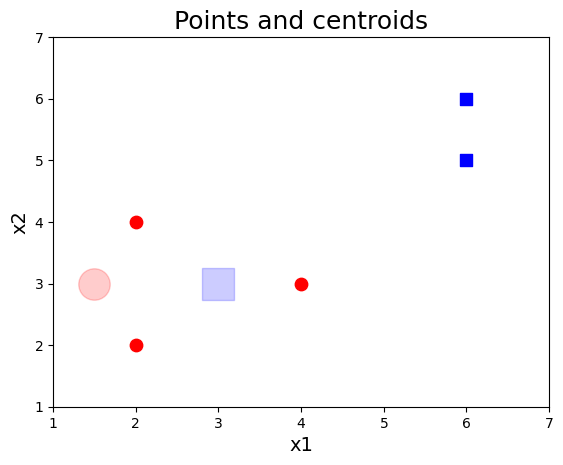

In [13]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1=df[cluster==1]
df2=df[cluster==2]
plt.scatter (df1.x1,df1.x2, s=80, color='r', marker='o', label='Cluster 1')
plt.scatter (df2.x1,df2.x2, s=80, color='b', marker='s', label='Cluster 2')
plt.scatter (C1[0], C1[1], color='r', marker= 'o', label= 'Centroide 1', s=512, alpha=0.2)
plt.scatter (C2[0], C2[1], color= 'b', marker='s', label= 'Centroide 2', s=512, alpha=0.2)
plt.title('Points and centroids', fontsize=18)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.xlim(1,7)
plt.ylim(1,7)
plt. show()

## 5: Compute the new centroid (mean) of each cluster

Compute the new centroid of each cluster

In [14]:
# Let's compute the 1st Centroid
print(df1)
C1new[0]=df1.x1.mean()
C1new[1]=df1.x2.mean()


print(C1new)

   x1  x2
0   2   2
1   4   3
2   2   4
[2.66666667 3.        ]


In [15]:
# Let's compute the 2nd Centroid
print(df2)
C2new[0]=df2.x1.mean()
C2new[1]=df2.x2.mean()


print(C2new)

   x1  x2
3   6   6
4   6   5
[6.  5.5]


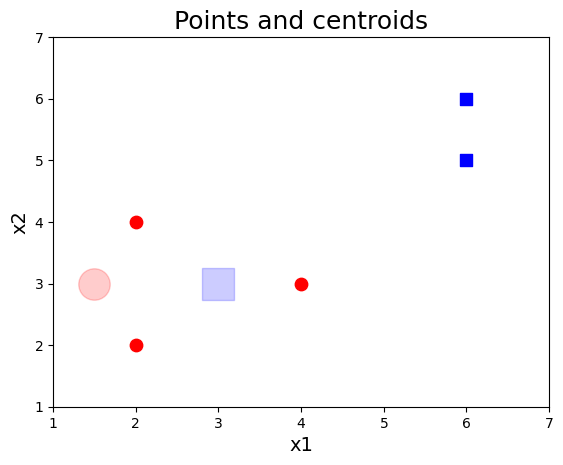

In [16]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1=df[cluster==1]
df2=df[cluster==2]
plt.scatter (df1.x1,df1.x2, s=80, color='r', marker='o', label='Cluster 1')
plt.scatter (df2.x1,df2.x2, s=80, color='b', marker='s', label='Cluster 2')
plt.scatter (C1[0], C1[1], color='r', marker= 'o', label= 'Centroide 1', s=512, alpha=0.2)
plt.scatter (C2[0], C2[1], color= 'b', marker='s', label= 'Centroide 2', s=512, alpha=0.2)
plt.title('Points and centroids', fontsize=18)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.xlim(1,7)
plt.ylim(1,7)
plt. show()


## 6: Until the centroids do not change

If the centroids do not change, then, none of the data points change of the assigned cluster


In [17]:
print(C1)
print(C1new)

[1.5 3. ]
[2.66666667 3.        ]


In [18]:
print(C2)
print(C2new)

[3. 3.]
[6.  5.5]


#### If the centroids do change... go to 3 (recall to use the new centroids)

#### If the centroids do not change... done ¡¡